In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder


import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv('data/Mall_Customers.csv')

# drop CustomerID column, we don't need it
df = df.drop('CustomerID', axis=1)

In [29]:
# Rename columns
df.columns = ['Gender', 'Age', 'Income', 'Score']
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  200 non-null    object
 1   Age     200 non-null    int64 
 2   Income  200 non-null    int64 
 3   Score   200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [31]:
df.isna().sum()

Gender    0
Age       0
Income    0
Score     0
dtype: int64

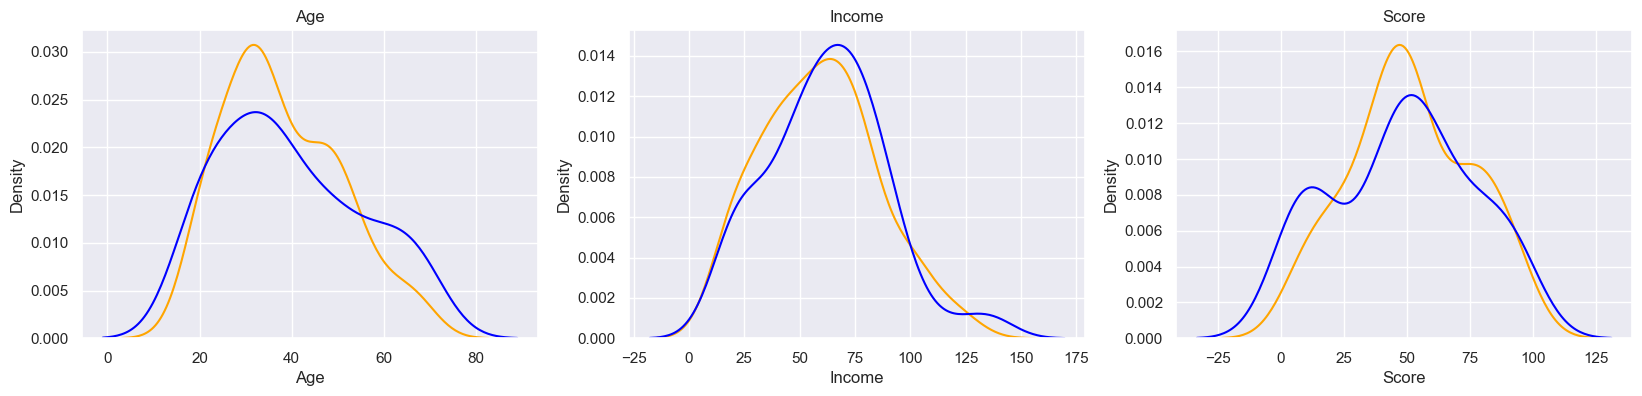

In [32]:
plt.figure(figsize=(20,4))
plt.subplot(1,3,1)
sns.distplot(df.Age[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.Age[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Age')

plt.subplot(1,3,2)
sns.distplot(df.Income[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.Income[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Income')

plt.subplot(1,3,3)
sns.distplot(df.Score[df['Gender']=='Female'], color='orange', hist=False, kde=True, label='Female')
sns.distplot(df.Score[df['Gender']=='Male'], color='blue', hist=False, kde=True, label='Male')
plt.title('Score')

plt.show()

Relation between variables

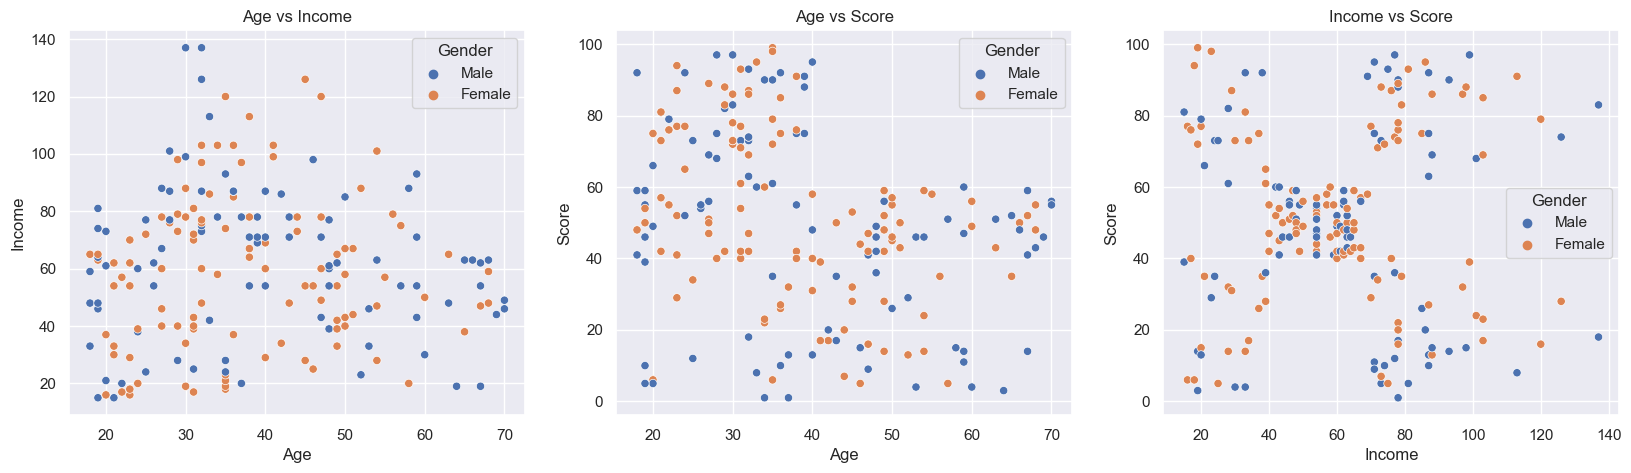

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df.Age, y=df.Income, hue=df.Gender)
plt.title('Age vs Income')

plt.subplot(1,3,2)
sns.scatterplot(x=df.Age, y=df.Score, hue=df.Gender)
plt.title('Age vs Score')

plt.subplot(1,3,3)
sns.scatterplot(x=df.Income, y=df.Score, hue=df.Gender)
plt.title('Income vs Score')

plt.show()

 did actually... you can see there seems to be 2 groups of customers by age vs score (top left quarter vs bottom right quarter), where diagonal is delimiting them.

What is more important is actually chart Income vs Score where we can see 5 different groups of customers (corners & center). What does it mean? We've probably found ideal way to cluster our customers based on income and score!

**Income & Score by Age**

Last, check if there is significant difference (increasing/decreasing trend) when looking on Income or Score by Age. What is bit weird for me is that 18 years people has almost same score as 60 years old.

You may notice that income seems to be highest for age group 25-50 comparing to others and similary, score is higer for group of people in age 20-40 comparing to others.

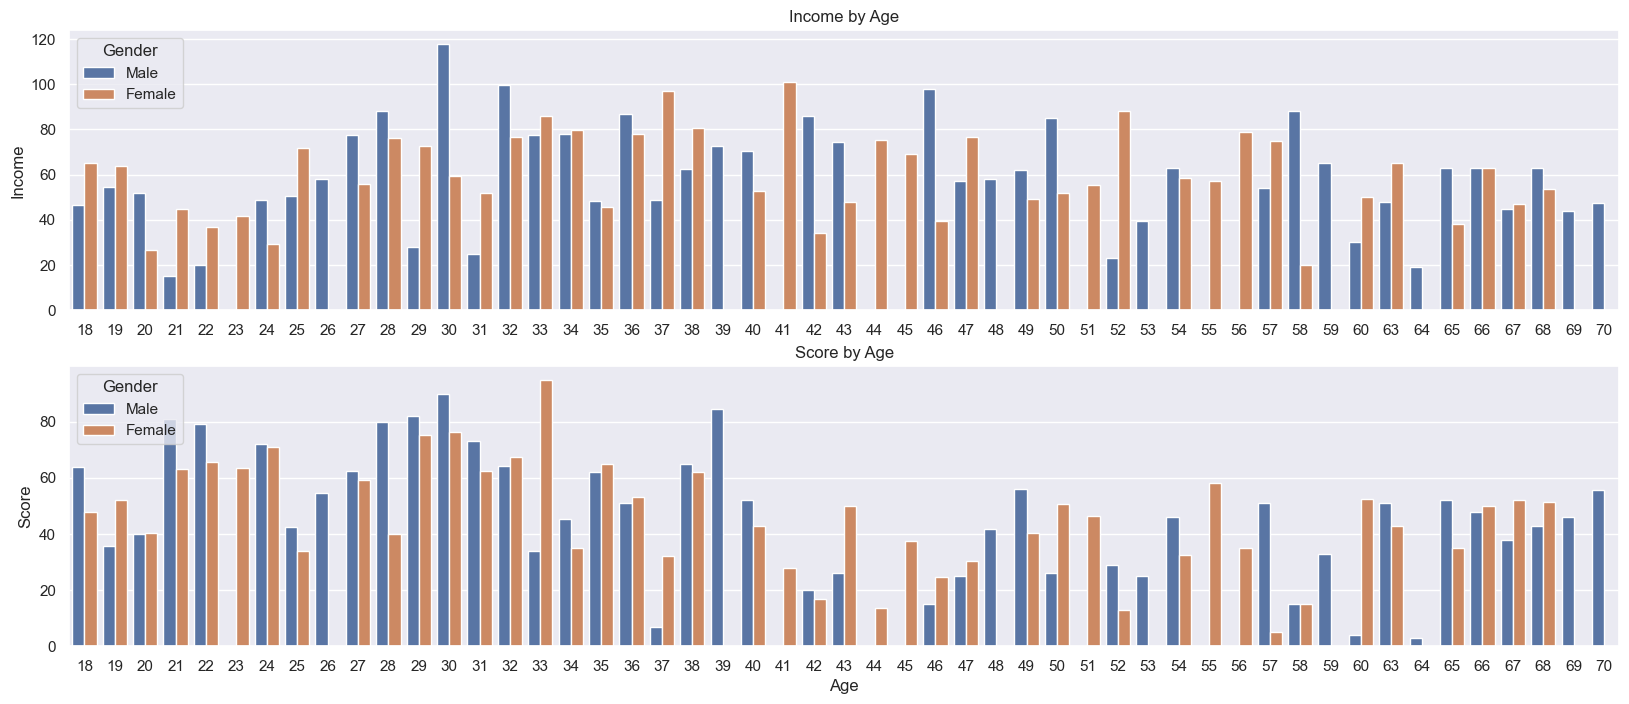

In [34]:
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
sns.barplot(x=df.Age, y=df.Income, hue=df.Gender, ci=0)
plt.title('Income by Age')
plt.xlabel('')

plt.subplot(2,1,2)
sns.barplot(x=df.Age, y=df.Score, hue=df.Gender, ci=0)
plt.title('Score by Age')

plt.show()

# Processing

In [35]:
df

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [36]:
df.Gender.nunique()

2

In [37]:
ordinal_encoder = OrdinalEncoder()
df['Gender'] = ordinal_encoder.fit_transform(df['Gender'].values.reshape(-1, 1))

# Model

In [38]:
X = df.iloc[:,[2,3]].values # Annual Income & Spending Score

**Choosing the number of clusters**

WCSS: Within Clusters Sum of Squares

In [39]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

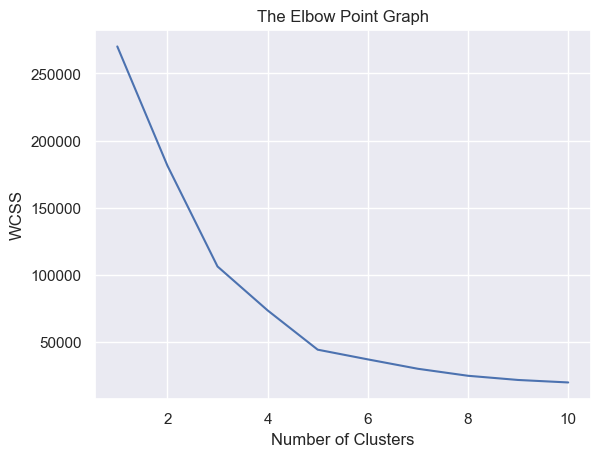

In [40]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.savefig('images/number_clusters.png')

plt.show();

Optimum number of clusters is: 5

## Traing k-Means clustering model

In [41]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster

y = kmeans.fit_predict(X)

In [42]:
kmeans.score(X)

-44448.45544793371

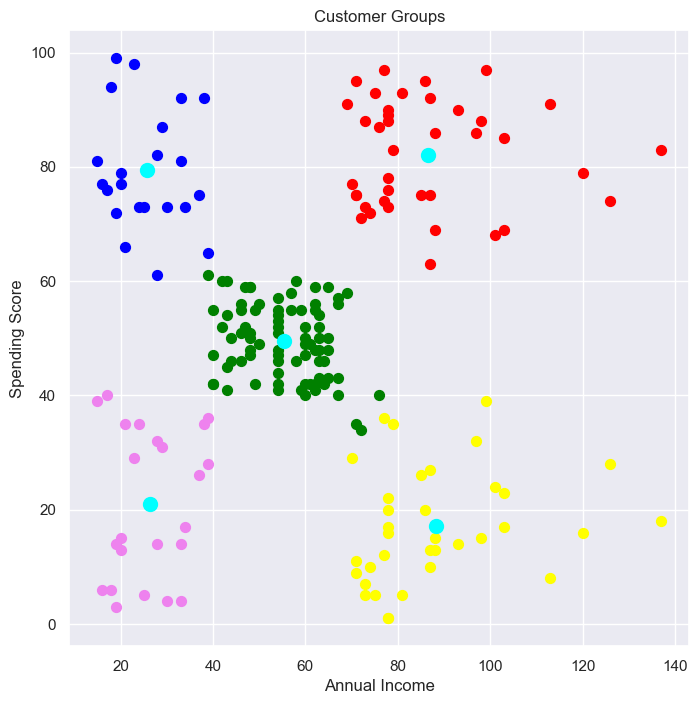

In [43]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0], X[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y==1,0], X[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y==2,0], X[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y==3,0], X[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[y==4,0], X[y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(X[y==5,0], X[y==5,1], s=50, c='black', label='Cluster 6')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.savefig('images/customer_grougs.png')

plt.show()

# Conclusion

We have selected to have 5 clusters, meaning 5 customer groups. But who are people in these groups? Let's try to describe them for marketing team!

* **Poor and not-spender**: customers with low income and low spending score (cluster #4)
* **Poor and spender**: customers with low income, but spending a lot (cluster #1)
* **Neutral**: customers with mid income and mid spending score (cluster #0)
* **Rich and not-spender**: customers with high income and low spending score (cluster #2)
* **Rich and spender**: customers with high income and high spending score (cluster #3)

Which group should marketing team target?